### 1. Introduction
 Naive Bayes is a family of probablilistic algorithms based on Bayes' Theorem, paticularly suited for the classification tasks. It is widely uesd in spam detection, sentiment analysis, document, and medical diagnosis sue to it's simplicity and effectiveness.

### 2. Key features of Naive Bayes Classifiers
 + Simple and fast
 + Handles high-dimenstional data well
 + Performs well with categorical and text data
 + requires small amounts of training data

### 3. Assumptions in Naive Bayes
 + Feature Independence
 + Equal Importance
 + No missing Values

### 4. Types of Naive Bayes Classifier
 + Gaussian NB
 + Multinomial NB
 + Bernoulli NB

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df["Sentiment"][0]

'positive'

In [5]:
df.drop(0, inplace= True)

In [6]:
df.head()

,Sentence,Sentiment
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive


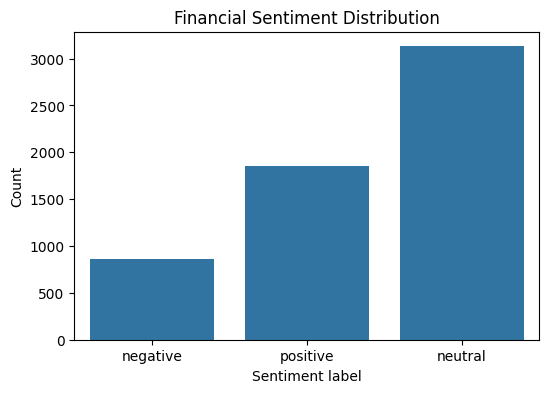

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)
plt.title("Financial Sentiment Distribution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [8]:
new_df = df[df["Sentiment"] != "neutral"].reset_index(drop=True)
new_df.head()

,Sentence,Sentiment
0,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [9]:
new_df.head()

,Sentence,Sentiment
0,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [10]:
positive_df = new_df[new_df["Sentiment"] == "positive"]
negative_df = new_df[new_df["Sentiment"] != "positive"]

positive_df_reduced = positive_df.sample(frac =0.6, random_state=42)
new_df = pd.concat([positive_df_reduced, negative_df]).reset_index(drop= True)
new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

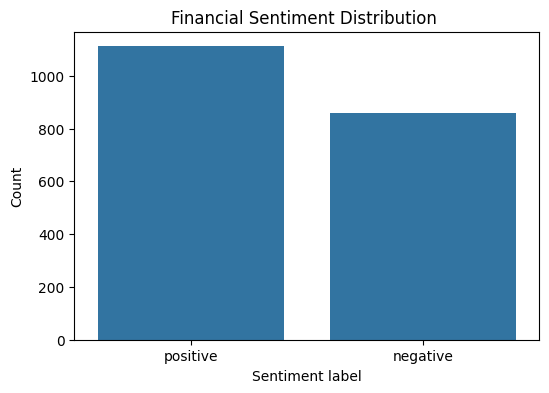

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x="Sentiment")
plt.title("Financial Sentiment Distribution ")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()


In [12]:
! pip install nltk

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
import re

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\RICKY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
#initialize tools 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [15]:
def preprocess(text):
    #lowercase
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #tokenize
    tokens = word_tokenize(text)
    #remove stopwords
    cleaned = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(cleaned)

In [24]:
new_df['clean_text'] = new_df['Sentence'].apply(preprocess)

In [26]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(new_df['clean_text'])
y = new_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [27]:
senti_model = MultinomialNB()
senti_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred = senti_model.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.64      0.73       184
    positive       0.74      0.91      0.82       211

    accuracy                           0.78       395
   macro avg       0.80      0.77      0.77       395
weighted avg       0.80      0.78      0.78       395



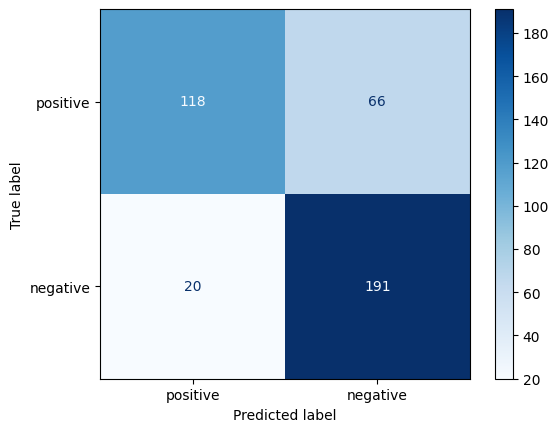

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_df['Sentiment'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [33]:
sample_text = "The company's stock price has been rising steadily over the past year. It is better investing on stock market"

#preprocess the sample text
sample_text_cleaned = preprocess(sample_text)

#vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

#predict
predicted_category = senti_model.predict(sample_vector)
print("Predicted Category :", predicted_category[0])

Predicted Category : positive


In [34]:
import pickle

with open('senti_model.pkl', 'wb') as model_file:
    pickle.dump(senti_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)